In [4]:
# Brute-Force Algorithm
def matrix_chain_multiplication_brute_force(P):
    n = len(P) - 1  # Number of matrices in the chain

    def multiply_matrices(i, j):
        if i == j:
            return 0
        
        min_scalar_multiplications = sys.maxsize
        optimal_parenthesization = None

        for k in range(i, j):
            left_scalar_multiplications = multiply_matrices(i, k)
            right_scalar_multiplications = multiply_matrices(k + 1, j)

            # Calculate scalar multiplications for the current parenthesization
            scalar_multiplications = (
                left_scalar_multiplications
                + right_scalar_multiplications
                + P[i - 1] * P[k] * P[j]
            )

            # Update the minimum scalar multiplications and optimal parenthesization
            if scalar_multiplications < min_scalar_multiplications:
                min_scalar_multiplications = scalar_multiplications
                optimal_parenthesization = (i, k, j)

        return min_scalar_multiplications

    # Call the recursive function to get the minimum scalar multiplications
    min_scalar_multiplications = multiply_matrices(1, n)
    return min_scalar_multiplications

In [5]:
# Dynamic Programming Algorithm
def matrix_chain_multiplication_dynamic_programming(P):
    n = len(P) - 1  # Number of matrices in the chain

    # Create the two-dimensional arrays for storing results
    m = [[0] * (n + 1) for _ in range(n + 1)]
    s = [[0] * (n + 1) for _ in range(n + 1)]

    # Initialize the diagonal elements of m to 0
    for i in range(1, n + 1):
        m[i][i] = 0

    # Compute the minimum number of scalar multiplications for each chain length
    for l in range(2, n + 1):
        for i in range(1, n - l + 2):
            j = i + l - 1
            m[i][j] = sys.maxsize

            for k in range(i, j):
                # Calculate temporary cost
                temp_cost = m[i][k] + m[k + 1][j] + P[i - 1] * P[k] * P[j]

                if temp_cost < m[i][j]:
                    m[i][j] = temp_cost
                    s[i][j] = k

    # Construct the optimal parenthesization
    def construct_parenthesization(s, i, j):
        if i == j:
            return "A" + str(i)

        k = s[i][j]
        left_expression = construct_parenthesization(s, i, k)
        right_expression = construct_parenthesization(s, k + 1, j)

        return "(" + left_expression + " * " + right_expression + ")"

    # Call the function to construct the optimal parenthesization
    optimal_parenthesization = construct_parenthesization(s, 1, n)

    # Return the minimum number of scalar multiplications and the optimal parenthesization
    return m[1][n], optimal_parenthesization

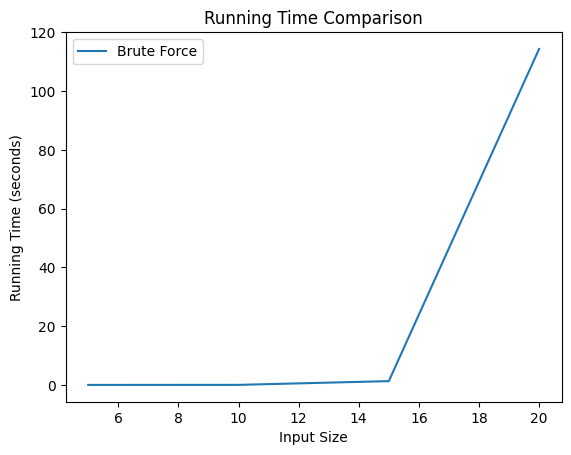

In [10]:
# Generate random input sizes for testing
input_sizes = [5,10,15,20]

# Initialize lists to store running times for both algorithms
brute_force_times = []


# Run the algorithms for different input sizes and measure the running times
for size in input_sizes:
    # Generate random dimensions for the matrix chain
    dimensions = [2 ** i for i in range(1, size + 1)]
    
    # Measure the running time of the brute-force algorithm
    brute_force_time = timeit.timeit(lambda: matrix_chain_multiplication_brute_force(dimensions), number=1)
    brute_force_times.append(brute_force_time)

# Plot the running times of both algorithms
plt.plot(input_sizes, brute_force_times, label="Brute Force")
plt.xlabel("Input Size")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.title("Running Time Comparison")
plt.show()

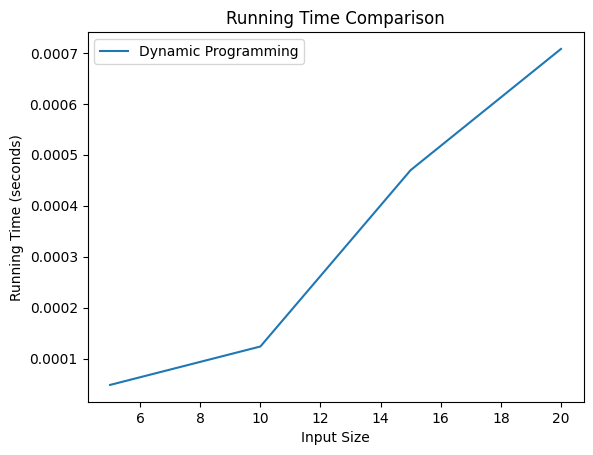

In [12]:
# Generate random input sizes for testing
input_sizes = [5,10,15,20]

# Initialize lists to store running times for both algorithms
dynamic_programming_times = []

# Run the algorithms for different input sizes and measure the running times
for size in input_sizes:
    # Generate random dimensions for the matrix chain
    dimensions = [2 ** i for i in range(1, size + 1)]

    # Measure the running time of the dynamic programming algorithm
    dynamic_programming_time = timeit.timeit(lambda: matrix_chain_multiplication_dynamic_programming(dimensions), number=1)
    dynamic_programming_times.append(dynamic_programming_time)

# Plot the running times of both algorithms
plt.plot(input_sizes, dynamic_programming_times, label="Dynamic Programming")
plt.xlabel("Input Size")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.title("Running Time Comparison")
plt.show()

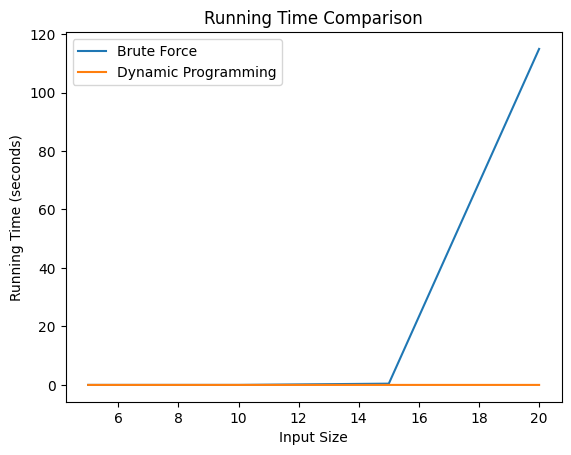

Brute-Force Times: [1.5165000149863772e-05, 0.0021312279995981953, 0.43349212300017825, 114.92153586099994]
Dynamic Programming Times: [1.816200074244989e-05, 9.751499965204857e-05, 0.00025236500005121343, 0.0003827460004686145]


In [13]:
import sys
import timeit
import matplotlib.pyplot as plt

# Brute-Force Algorithm
def matrix_chain_multiplication_brute_force(P):
    n = len(P) - 1  # Number of matrices in the chain

    def multiply_matrices(i, j):
        if i == j:
            return 0
        
        min_scalar_multiplications = sys.maxsize
        optimal_parenthesization = None

        for k in range(i, j):
            left_scalar_multiplications = multiply_matrices(i, k)
            right_scalar_multiplications = multiply_matrices(k + 1, j)

            # Calculate scalar multiplications for the current parenthesization
            scalar_multiplications = (
                left_scalar_multiplications
                + right_scalar_multiplications
                + P[i - 1] * P[k] * P[j]
            )

            # Update the minimum scalar multiplications and optimal parenthesization
            if scalar_multiplications < min_scalar_multiplications:
                min_scalar_multiplications = scalar_multiplications
                optimal_parenthesization = (i, k, j)

        return min_scalar_multiplications

    # Call the recursive function to get the minimum scalar multiplications
    min_scalar_multiplications = multiply_matrices(1, n)
    return min_scalar_multiplications

# Dynamic Programming Algorithm
def matrix_chain_multiplication_dynamic_programming(P):
    n = len(P) - 1  # Number of matrices in the chain

    # Create the two-dimensional arrays for storing results
    m = [[0] * (n + 1) for _ in range(n + 1)]
    s = [[0] * (n + 1) for _ in range(n + 1)]

    # Initialize the diagonal elements of m to 0
    for i in range(1, n + 1):
        m[i][i] = 0

    # Compute the minimum number of scalar multiplications for each chain length
    for l in range(2, n + 1):
        for i in range(1, n - l + 2):
            j = i + l - 1
            m[i][j] = sys.maxsize

            for k in range(i, j):
                # Calculate temporary cost
                temp_cost = m[i][k] + m[k + 1][j] + P[i - 1] * P[k] * P[j]

                if temp_cost < m[i][j]:
                    m[i][j] = temp_cost
                    s[i][j] = k

    # Construct the optimal parenthesization
    def construct_parenthesization(s, i, j):
        if i == j:
            return "A" + str(i)

        k = s[i][j]
        left_expression = construct_parenthesization(s, i, k)
        right_expression = construct_parenthesization(s, k + 1, j)

        return "(" + left_expression + " * " + right_expression + ")"

    # Call the function to construct the optimal parenthesization
    optimal_parenthesization = construct_parenthesization(s, 1, n)

    # Return the minimum number of scalar multiplications and the optimal parenthesization
    return m[1][n], optimal_parenthesization

# Generate random input sizes for testing
input_sizes = [5,10,15,20]

# Initialize lists to store running times for both algorithms
brute_force_times = []
dynamic_programming_times = []

# Run the algorithms for different input sizes and measure the running times
for size in input_sizes:
    # Generate random dimensions for the matrix chain
    dimensions = [2 ** i for i in range(1, size + 1)]
    
    # Measure the running time of the brute-force algorithm
    brute_force_time = timeit.timeit(lambda: matrix_chain_multiplication_brute_force(dimensions), number=1)
    brute_force_times.append(brute_force_time)

    # Measure the running time of the dynamic programming algorithm
    dynamic_programming_time = timeit.timeit(lambda: matrix_chain_multiplication_dynamic_programming(dimensions), number=1)
    dynamic_programming_times.append(dynamic_programming_time)

# Plot the running times of both algorithms
plt.plot(input_sizes, brute_force_times, label="Brute Force")
plt.plot(input_sizes, dynamic_programming_times, label="Dynamic Programming")
plt.xlabel("Input Size")
plt.ylabel("Running Time (seconds)")
plt.legend()
plt.title("Running Time Comparison")
plt.show()

# Print the running times for each algorithm
print("Brute-Force Times:", brute_force_times)
print("Dynamic Programming Times:", dynamic_programming_times)


使用暴力法的時間複雜度為O(2^n)，使用Dynamic Programming的時間複雜度為O(n^3)，根據以上的圖可以看出，暴力法在n=15時執行時間就開始直線上升，Dynamic Programming所需的時間隨著Input size所成長的速度較慢，所以如果Iuput size越大，轉而使用Dynammic Programming方法可以大大降低所需的執行時間。